In [2]:
import pandas as pd

In [4]:
# import the dataset
data = pd.read_csv("data/german_data_clean.csv")

In [5]:
# show technical information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   checking_account           1000 non-null   object
 1   duration_months            1000 non-null   int64 
 2   credit_history             1000 non-null   object
 3   purpose                    1000 non-null   object
 4   credit_amount              1000 non-null   int64 
 5   savings                    1000 non-null   object
 6   present_employment_since   1000 non-null   object
 7   installment_rate           1000 non-null   int64 
 8   personal_status_sex        1000 non-null   object
 9   other_deptors              1000 non-null   object
 10  present_residence          1000 non-null   int64 
 11  property                   1000 non-null   object
 12  age_years                  1000 non-null   int64 
 13  other_installment_plans    1000 non-null   object
 14  housing  

In [6]:
# show statistical information
data.describe()

,duration_months,credit_amount,installment_rate,present_residence,age_years,existing_credits,people_liable_maintenance,response
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,0.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,0.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,1.000000


,checking_account,duration_months,credit_history,purpose,credit_amount,savings,present_employment_since,installment_rate,personal_status_sex,other_deptors,...,property,age_years,other_installment_plans,housing,existing_credits,job,people_liable_maintenance,telephone,foreign_worker,response
0,... < 0 euro,6,critical account/other credits existing (not a...,radio/television,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,...,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes,0
1,0 <= ... < 102 euro,48,existing credits paid back duly till now,radio/television,5951,... < 51 euro,1 <= ... < 4 years,2,female : divorced/separated/married,none,...,real estate,22,none,own,1,skilled employee / official,1,none,yes,1
2,No checking account,12,critical account/other credits existing (not a...,education,2096,... < 51 euro,4 <= ... < 7 years,2,male : single,none,...,real estate,49,none,own,1,unskilled - resident,2,none,yes,0
3,... < 0 euro,42,existing credits paid back duly till now,furniture/equipment,7882,... < 51 euro,4 <= ... < 7 years,2,male : single,guarantor,...,(if not real estate) building society savings ...,45,none,for free,1,skilled employee / official,2,none,yes,0
4,... < 0 euro,24,delay in paying off in the past,car (new),4870,... < 51 euro,1 <= ... < 4 years,3,male : single,none,...,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes,1
5,No checking account,36,existing credits paid back duly till now,education,9055,unknown/ no savings account,1 <= ... < 4 years,2,male : single,none,...,unknown / no property,35,none,for free,1,unskilled - resident,2,"yes, registered under the customers name",yes,0
6,No checking account,24,existing credits paid back duly till now,furniture/equipment,2835,255 euro <= ... < 511 euro,.. >= 7 years,3,male : single,none,...,(if not real estate) building society savings ...,53,none,own,1,skilled employee / official,1,none,yes,0
7,0 <= ... < 102 euro,36,existing credits paid back duly till now,car (used),6948,... < 51 euro,1 <= ... < 4 years,2,male : single,none,...,"(if not optin 1 or 2) car or other, not in att...",35,none,rent,1,management/ self-employed/highly qualified emp...,1,"yes, registered under the customers name",yes,0
8,No checking account,12,existing credits paid back duly till now,radio/television,3059,.. >= 511 euro,4 <= ... < 7 years,2,male : divorced/separated,none,...,real estate,61,none,own,1,unskilled - resident,1,none,yes,0
9,0 <= ... < 102 euro,30,critical account/other credits existing (not a...,car (new),5234,... < 51 euro,unemployed,4,male : married/widowed,none,...,"(if not optin 1 or 2) car or other, not in att...",28,none,own,2,management/ self-employed/highly qualified emp...,1,none,yes,1


In [21]:
data.iloc[:4, [3, 5, 9]]

,purpose,savings,other_deptors
0,radio/television,unknown/ no savings account,none
1,radio/television,... < 51 euro,none
2,education,... < 51 euro,none
3,furniture/equipment,... < 51 euro,guarantor


In [24]:
# calculated columns
data['monthly_payment'] = (data['credit_amount'] / data['duration_months']).round(2)
data['monthly_payment'].head()

0    194.83
1    123.98
2    174.67
3    187.67
4    202.92
Name: monthly_payment, dtype: float64

In [32]:
# filtering: Method 1

selected_purposes = ['business', 'education']

data[(data['credit_amount'] > 5000) &
     (data['duration_months'] > 40) & 
     (data['purpose'].isin(selected_purposes))
     ]

,checking_account,duration_months,credit_history,purpose,credit_amount,savings,present_employment_since,installment_rate,personal_status_sex,other_deptors,...,age_years,other_installment_plans,housing,existing_credits,job,people_liable_maintenance,telephone,foreign_worker,response,monthly_payment
29,... < 0 euro,60,delay in paying off in the past,business,6836,... < 51 euro,.. >= 7 years,3,male : single,none,...,63,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes,1,113.93
36,No checking account,48,critical account/other credits existing (not a...,education,6110,... < 51 euro,1 <= ... < 4 years,1,male : single,none,...,31,bank,for free,1,skilled employee / official,1,"yes, registered under the customers name",yes,0,127.29
63,0 <= ... < 102 euro,48,no credits taken/ all credits paid back duly,business,14421,... < 51 euro,1 <= ... < 4 years,2,male : single,none,...,25,none,own,1,skilled employee / official,1,"yes, registered under the customers name",yes,1,300.44
73,0 <= ... < 102 euro,42,critical account/other credits existing (not a...,business,5954,... < 51 euro,4 <= ... < 7 years,2,female : divorced/separated/married,none,...,41,bank,own,2,unskilled - resident,1,none,yes,0,141.76
95,0 <= ... < 102 euro,54,no credits taken/ all credits paid back duly,business,15945,... < 51 euro,... < 1 year,3,male : single,none,...,58,none,rent,1,skilled employee / official,1,"yes, registered under the customers name",yes,1,295.28
294,No checking account,48,critical account/other credits existing (not a...,business,7629,unknown/ no savings account,.. >= 7 years,4,male : divorced/separated,none,...,46,bank,own,2,management/ self-employed/highly qualified emp...,2,none,yes,0,158.94
375,... < 0 euro,48,all credits at this bank paid back duly,business,7685,... < 51 euro,4 <= ... < 7 years,2,female : divorced/separated/married,guarantor,...,37,none,rent,1,skilled employee / official,1,none,yes,1,160.10
615,0 <= ... < 102 euro,48,no credits taken/ all credits paid back duly,business,12204,unknown/ no savings account,1 <= ... < 4 years,2,male : single,none,...,48,bank,own,1,management/ self-employed/highly qualified emp...,1,"yes, registered under the customers name",yes,0,254.25
650,... < 0 euro,48,existing credits paid back duly till now,education,7476,... < 51 euro,4 <= ... < 7 years,4,male : single,none,...,50,none,for free,1,management/ self-employed/highly qualified emp...,1,"yes, registered under the customers name",yes,0,155.75
728,0 <= ... < 102 euro,48,all credits at this bank paid back duly,business,6416,... < 51 euro,.. >= 7 years,4,female : divorced/separated/married,none,...,59,none,rent,1,skilled employee / official,1,none,yes,1,133.67


In [30]:
# method 2 for filtering
selected_purposes = ['business', 'education']

data.query("credit_amount > 5000 & duration_months > 40 & purpose == @selected_purposes")

,checking_account,duration_months,credit_history,purpose,credit_amount,savings,present_employment_since,installment_rate,personal_status_sex,other_deptors,...,age_years,other_installment_plans,housing,existing_credits,job,people_liable_maintenance,telephone,foreign_worker,response,monthly_payment
29,... < 0 euro,60,delay in paying off in the past,business,6836,... < 51 euro,.. >= 7 years,3,male : single,none,...,63,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes,1,113.93
36,No checking account,48,critical account/other credits existing (not a...,education,6110,... < 51 euro,1 <= ... < 4 years,1,male : single,none,...,31,bank,for free,1,skilled employee / official,1,"yes, registered under the customers name",yes,0,127.29
63,0 <= ... < 102 euro,48,no credits taken/ all credits paid back duly,business,14421,... < 51 euro,1 <= ... < 4 years,2,male : single,none,...,25,none,own,1,skilled employee / official,1,"yes, registered under the customers name",yes,1,300.44
73,0 <= ... < 102 euro,42,critical account/other credits existing (not a...,business,5954,... < 51 euro,4 <= ... < 7 years,2,female : divorced/separated/married,none,...,41,bank,own,2,unskilled - resident,1,none,yes,0,141.76
95,0 <= ... < 102 euro,54,no credits taken/ all credits paid back duly,business,15945,... < 51 euro,... < 1 year,3,male : single,none,...,58,none,rent,1,skilled employee / official,1,"yes, registered under the customers name",yes,1,295.28
294,No checking account,48,critical account/other credits existing (not a...,business,7629,unknown/ no savings account,.. >= 7 years,4,male : divorced/separated,none,...,46,bank,own,2,management/ self-employed/highly qualified emp...,2,none,yes,0,158.94
375,... < 0 euro,48,all credits at this bank paid back duly,business,7685,... < 51 euro,4 <= ... < 7 years,2,female : divorced/separated/married,guarantor,...,37,none,rent,1,skilled employee / official,1,none,yes,1,160.10
615,0 <= ... < 102 euro,48,no credits taken/ all credits paid back duly,business,12204,unknown/ no savings account,1 <= ... < 4 years,2,male : single,none,...,48,bank,own,1,management/ self-employed/highly qualified emp...,1,"yes, registered under the customers name",yes,0,254.25
650,... < 0 euro,48,existing credits paid back duly till now,education,7476,... < 51 euro,4 <= ... < 7 years,4,male : single,none,...,50,none,for free,1,management/ self-employed/highly qualified emp...,1,"yes, registered under the customers name",yes,0,155.75
728,0 <= ... < 102 euro,48,all credits at this bank paid back duly,business,6416,... < 51 euro,.. >= 7 years,4,female : divorced/separated/married,none,...,59,none,rent,1,skilled employee / official,1,none,yes,1,133.67


In [127]:
# group by
selected_columns = ['purpose', 'credit_amount', 'duration_months', 'job']
selected_purposes = ['car (used)', 'car (new)']

data_grouped = (
    data[selected_columns]
    .groupby(['purpose', 'job'])
    .agg({'credit_amount': 'sum', 
          'duration_months': 'mean'})
    .reset_index()
    .rename(columns={'credit_amount': 'total_credit_amount', 
                     'duration_months': 'average_duration_months'})
    .sort_values('total_credit_amount', ascending=False)
    .assign(
        purpose_job = lambda x: (x['job'] + "" + x['purpose']).replace(" ", "_").replace("/")
    )
    .loc[:, ['purpose_job', 'total_credit_amount', 'average_duration_months']]
)

data_grouped

,purpose_job,total_credit_amount,average_duration_months
28,skilled employee / official_radio/television,507654,207.179487
20,skilled employee / official_furniture/equipment,378121,196.190476
5,skilled employee / official_car (new),352113,198.076923
9,skilled employee / official_car (used),282460,254.666667
1,skilled employee / official_business,261920,285.500000
8,management/ self-employed/highly qualified emp...,226075,260.000000
4,management/ self-employed/highly qualified emp...,206374,245.882353
7,unskilled - resident_car (new),125453,134.745763
16,skilled employee / official_education,104697,226.562500
30,unskilled - resident_radio/television,95564,158.070175


In [131]:
selected_columns = ['purpose', 'credit_amount', 'age_years', 'job']

(
    data[selected_columns]
    
    .loc[:, ['job', 'age_years']]
)

,job,age_years
0,skilled employee / official,670
1,skilled employee / official,220
2,unskilled - resident,490
3,skilled employee / official,450
4,skilled employee / official,530
...,...,...
995,unskilled - resident,310
996,management/ self-employed/highly qualified emp...,400
997,skilled employee / official,380
998,skilled employee / official,230


In [61]:
checking_account_values = data['checking_account'].unique().tolist()
monetary_account_values = [-100, 50, 0, 150]

df_monetary_values = pd.DataFrame({'checking_account': checking_account_values, 
                                   'monetary_account': monetary_account_values})

In [62]:
df_monetary_values

,checking_account,monetary_account
0,... < 0 euro,-100
1,0 <= ... < 102 euro,50
2,No checking account,0
3,>= 102 euro,150


In [63]:
data['checking_account_monetary'] = data['checking_account'].map(df_monetary_values.set_index('checking_account')['monetary_account'])

In [64]:
data

,checking_account,duration_months,credit_history,purpose,credit_amount,savings,present_employment_since,installment_rate,personal_status_sex,other_deptors,...,other_installment_plans,housing,existing_credits,job,people_liable_maintenance,telephone,foreign_worker,response,monthly_payment,checking_account_monetary
0,... < 0 euro,6,critical account/other credits existing (not a...,radio/television,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,...,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes,0,194.83,-100
1,0 <= ... < 102 euro,48,existing credits paid back duly till now,radio/television,5951,... < 51 euro,1 <= ... < 4 years,2,female : divorced/separated/married,none,...,none,own,1,skilled employee / official,1,none,yes,1,123.98,50
2,No checking account,12,critical account/other credits existing (not a...,education,2096,... < 51 euro,4 <= ... < 7 years,2,male : single,none,...,none,own,1,unskilled - resident,2,none,yes,0,174.67,0
3,... < 0 euro,42,existing credits paid back duly till now,furniture/equipment,7882,... < 51 euro,4 <= ... < 7 years,2,male : single,guarantor,...,none,for free,1,skilled employee / official,2,none,yes,0,187.67,-100
4,... < 0 euro,24,delay in paying off in the past,car (new),4870,... < 51 euro,1 <= ... < 4 years,3,male : single,none,...,none,for free,2,skilled employee / official,2,none,yes,1,202.92,-100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No checking account,12,existing credits paid back duly till now,furniture/equipment,1736,... < 51 euro,4 <= ... < 7 years,3,female : divorced/separated/married,none,...,none,own,1,unskilled - resident,1,none,yes,0,144.67,0
996,... < 0 euro,30,existing credits paid back duly till now,car (used),3857,... < 51 euro,1 <= ... < 4 years,4,male : divorced/separated,none,...,none,own,1,management/ self-employed/highly qualified emp...,1,"yes, registered under the customers name",yes,0,128.57,-100
997,No checking account,12,existing credits paid back duly till now,radio/television,804,... < 51 euro,.. >= 7 years,4,male : single,none,...,none,own,1,skilled employee / official,1,none,yes,0,67.00,0
998,... < 0 euro,45,existing credits paid back duly till now,radio/television,1845,... < 51 euro,1 <= ... < 4 years,4,male : single,none,...,none,for free,1,skilled employee / official,1,"yes, registered under the customers name",yes,1,41.00,-100


In [71]:
names_list = ['Arie', 'James', 'Jim']
ages_list = [10, 20, None]

df_person = pd.DataFrame({
    'name': names_list,
    'age': ages_list
})


df_person

,name,age
0,Arie,10.0
1,James,20.0
2,Jim,NaN


In [85]:
checking_account_values = data['checking_account'].unique().tolist()
monetary_account_values = [-100, 50, 0, 150]

df_monetary_values = pd.DataFrame({'checking_account': checking_account_values, 
                                   'monetary_amount': monetary_account_values})

df_monetary_values

,checking_account,monetary_amount
0,... < 0 euro,-100
1,0 <= ... < 102 euro,50
2,No checking account,0
3,>= 102 euro,150


In [93]:
df_monetary_values.set_index('checking_account')['monetary_amount']

checking_account
... <  0 euro          -100
0 <= ... <  102 euro     50
No checking account       0
>= 102 euro             150
Name: monetary_amount, dtype: int64

In [94]:
data['checkout_account_monetary'] = data['checking_account'].map(df_monetary_values.set_index('checking_account')['monetary_amount'])
data

,checking_account,duration_months,credit_history,purpose,credit_amount,savings,present_employment_since,installment_rate,personal_status_sex,other_deptors,...,other_installment_plans,housing,existing_credits,job,people_liable_maintenance,telephone,foreign_worker,response,monthly_payment,checkout_account_monetary
0,... < 0 euro,6,critical account/other credits existing (not a...,radio/television,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,...,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes,0,194.83,-100
1,0 <= ... < 102 euro,48,existing credits paid back duly till now,radio/television,5951,... < 51 euro,1 <= ... < 4 years,2,female : divorced/separated/married,none,...,none,own,1,skilled employee / official,1,none,yes,1,123.98,50
2,No checking account,12,critical account/other credits existing (not a...,education,2096,... < 51 euro,4 <= ... < 7 years,2,male : single,none,...,none,own,1,unskilled - resident,2,none,yes,0,174.67,0
3,... < 0 euro,42,existing credits paid back duly till now,furniture/equipment,7882,... < 51 euro,4 <= ... < 7 years,2,male : single,guarantor,...,none,for free,1,skilled employee / official,2,none,yes,0,187.67,-100
4,... < 0 euro,24,delay in paying off in the past,car (new),4870,... < 51 euro,1 <= ... < 4 years,3,male : single,none,...,none,for free,2,skilled employee / official,2,none,yes,1,202.92,-100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No checking account,12,existing credits paid back duly till now,furniture/equipment,1736,... < 51 euro,4 <= ... < 7 years,3,female : divorced/separated/married,none,...,none,own,1,unskilled - resident,1,none,yes,0,144.67,0
996,... < 0 euro,30,existing credits paid back duly till now,car (used),3857,... < 51 euro,1 <= ... < 4 years,4,male : divorced/separated,none,...,none,own,1,management/ self-employed/highly qualified emp...,1,"yes, registered under the customers name",yes,0,128.57,-100
997,No checking account,12,existing credits paid back duly till now,radio/television,804,... < 51 euro,.. >= 7 years,4,male : single,none,...,none,own,1,skilled employee / official,1,none,yes,0,67.00,0
998,... < 0 euro,45,existing credits paid back duly till now,radio/television,1845,... < 51 euro,1 <= ... < 4 years,4,male : single,none,...,none,for free,1,skilled employee / official,1,"yes, registered under the customers name",yes,1,41.00,-100


In [95]:
times_ten = lambda x: x * 10

In [96]:
times_ten(5)

50

In [97]:
data['credit_amount'].head()

0    1169
1    5951
2    2096
3    7882
4    4870
Name: credit_amount, dtype: int64

In [98]:
loan_value = lambda amount, installment, months: amount * (1 + (installment/100)) ** (months / 12)

In [99]:
loan_value(1000, 5, 36)

1157.6250000000002

In [101]:
loan_value(data['credit_amount'], 
           data['installment_rate'], 
           data['duration_months'])

0      1192.150762
1      6441.553784
2      2137.920000
3      8447.671779
4      5166.583000
          ...     
995    1788.080000
996    4254.347759
997     836.160000
998    2137.329071
999    5112.409209
Length: 1000, dtype: float64

In [106]:
data['present_value'] = data.apply(lambda x: loan_value(
                                                         x['credit_amount'], 
                                                         x['installment_rate'],
                                                         x['duration_months']),
                                                         axis =1)

In [107]:
def times_100(x):
    return x * 1000

In [109]:
data.apply(lambda x: times_100(x['age_years']), axis=1)

0      67000
1      22000
2      49000
3      45000
4      53000
       ...  
995    31000
996    40000
997    38000
998    23000
999    27000
Length: 1000, dtype: int64

In [111]:
data['present_value'].round(2)

0      1192.15
1      6441.55
2      2137.92
3      8447.67
4      5166.58
        ...   
995    1788.08
996    4254.35
997     836.16
998    2137.33
999    5112.41
Name: present_value, Length: 1000, dtype: float64

In [112]:
columns = ['age_years', 'duration_months']

for column in columns:
    data[column] = data[column] * 10 

In [114]:
data['duration_months']

0       60
1      480
2      120
3      420
4      240
      ... 
995    120
996    300
997    120
998    450
999    450
Name: duration_months, Length: 1000, dtype: int64

# Assignments

In [132]:
# 1. Import the german_data_clean.csv dataset as shown in the labs of this chapter.
data = pd.read_csv('data/german_data_clean.csv')

In [135]:
# 2. Create a new variable in the DataFrame called paid_back based on the response variable.    
import numpy as np

data['paid_back'] = np.where(data['response'] == 0, "yes", "no")
data['paid_back'].value_counts()

paid_back
yes    700
no     300
Name: count, dtype: int64

In [140]:
# 3/4/5/6. Create a subset of the DataFrame that only contains loans with a credit amount of 5000 or higher.
selected_columns = ['credit_amount', 'paid_back', 'purpose']

data_high_loans = (data[selected_columns]
    .query("credit_amount > 5000")
    .groupby('purpose')
    .agg({'credit_amount': 'mean'})
    .sort_values(by="credit_amount", ascending=False)
    .reset_index()
)

data_high_loans

,purpose,credit_amount
0,others,11450.750000
1,car (new),8614.050000
2,business,8488.153846
3,car (used),7909.469388
4,education,7890.750000
5,radio/television,7536.592593
6,furniture/equipment,7419.045455
7,repairs,7224.750000


In [141]:
# 7. using sqlite
import sqlite3

# specify the database path
db_path = "data/data.db"

# create the connection
con = sqlite3.connect(db_path)


In [145]:
# export the pandas dataframe to the database
data_high_loans.to_sql("high_loans", 
                       con, 
                       if_exists="replace",
                       index=False
                       )

8

In [146]:
# extra: Visualisation
data_high_loans

,purpose,credit_amount
0,others,11450.750000
1,car (new),8614.050000
2,business,8488.153846
3,car (used),7909.469388
4,education,7890.750000
5,radio/television,7536.592593
6,furniture/equipment,7419.045455
7,repairs,7224.750000


<Axes: xlabel='purpose'>

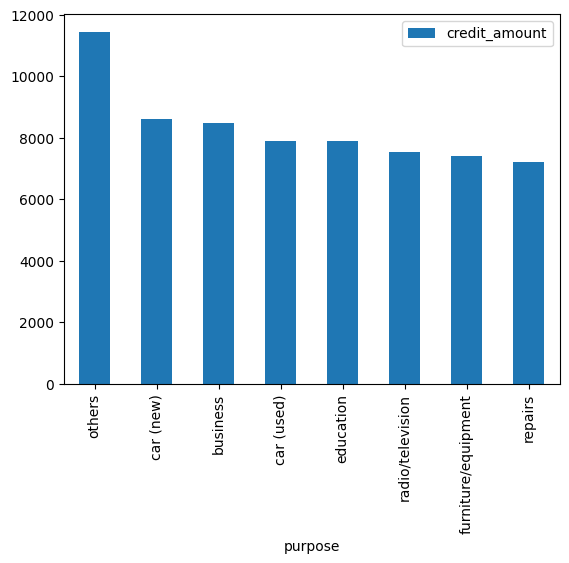

In [152]:
data_high_loans.plot.bar(x="purpose",
                         y="credit_amount")

In [154]:
pd.options.plotting.backend = "plotly"

In [163]:
!pip install ipykernel


[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: pip install --upgrade pip


In [165]:
data_high_loans.plot.bar(x="purpose", 
                         y="credit_amount")

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'purpose=%{x}<br>credit_amount=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': '',
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['others', 'car (new)', 'business', 'car (used)', 'education',
                          'radio/television', 'furniture/equipment', 'repairs'], dtype=object),
              'xaxis': 'x',
              'y': array([11450.75      ,  8614.05      ,  8488.15384615,  7909.46938776,
                           7890.75      ,  7536.59259259,  7419.04545455,  7224.75      ]),
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'purpose'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'credit_amount'}}}
})

In [158]:
!pip install nbformat

  Using cached nbformat-5.10.4-py3-none-any.whl.metadata (3.6 kB)
  Using cached jsonschema-4.22.0-py3-none-any.whl.metadata (8.2 kB)
  Using cached attrs-23.2.0-py3-none-any.whl.metadata (9.5 kB)
  Using cached jsonschema_specifications-2023.12.1-py3-none-any.whl.metadata (3.0 kB)
  Using cached referencing-0.35.1-py3-none-any.whl.metadata (2.8 kB)
  Using cached rpds_py-0.18.1-cp312-cp312-macosx_11_0_arm64.whl.metadata (4.1 kB)
Using cached nbformat-5.10.4-py3-none-any.whl (78 kB)
Using cached jsonschema-4.22.0-py3-none-any.whl (88 kB)
Using cached attrs-23.2.0-py3-none-any.whl (60 kB)
Using cached jsonschema_specifications-2023.12.1-py3-none-any.whl (18 kB)
Using cached referencing-0.35.1-py3-none-any.whl (26 kB)
Using cached rpds_py-0.18.1-cp312-cp312-macosx_11_0_arm64.whl (323 kB)

[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: pip install --upgrade pip
